# Introduction


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("3b01bcb8-0b14-4abf-b6f2-c1bfd384ba69.csv")

### Quick data quality check


In [3]:
data.shape

(3081, 11)

In [4]:
data.head()

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Assam,Silchar,"Tarapur, Silchar - PCBA",06-09-2025 07:00:00,24.828270,92.795250,NH3,1.0,1.0,1.0
1,India,Assam,Silchar,"Tarapur, Silchar - PCBA",06-09-2025 07:00:00,24.828270,92.795250,SO2,1.0,30.0,11.0
2,India,Assam,Silchar,"Tarapur, Silchar - PCBA",06-09-2025 07:00:00,24.828270,92.795250,CO,24.0,46.0,29.0
3,India,Assam,Sivasagar,"Girls College, Sivasagar - PCBA",06-09-2025 07:00:00,26.987634,94.636574,PM2.5,26.0,37.0,29.0
4,India,Assam,Sivasagar,"Girls College, Sivasagar - PCBA",06-09-2025 07:00:00,26.987634,94.636574,NO2,11.0,21.0,15.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        3081 non-null   object 
 1   state          3081 non-null   object 
 2   city           3081 non-null   object 
 3   station        3081 non-null   object 
 4   last_update    3081 non-null   object 
 5   latitude       3081 non-null   float64
 6   longitude      3081 non-null   float64
 7   pollutant_id   3081 non-null   object 
 8   pollutant_min  2871 non-null   float64
 9   pollutant_max  2871 non-null   float64
 10  pollutant_avg  2871 non-null   float64
dtypes: float64(5), object(6)
memory usage: 264.9+ KB


In [ ]:
data["last_update"] = pd.to_datetime(data["last_update"])
data["last_update"].dtype

dtype('<M8[ns]')

### Missing values in each columns


In [ ]:
print("Null values is each columns: \n", data.isnull().sum())

Null values is each columns: 
 country            0
state              0
city               0
station            0
last_update        0
latitude           0
longitude          0
pollutant_id       0
pollutant_min    210
pollutant_max    210
pollutant_avg    210
dtype: int64


#### Unique pollutants — list of unique pollutant_id values and counts for each (top ~10 if there are many).


In [ ]:
print("Unique polutant id and there counts: \n", data["pollutant_id"].value_counts())

Unique polutant id and there counts: 
 pollutant_id
PM10     455
NO2      453
PM2.5    451
SO2      440
CO       438
OZONE    438
NH3      406
Name: count, dtype: int64


#### Station coverage — number of unique station entries and the top 5 stations by number of measurements (station name + count).


In [ ]:
print("Number of stations: ", len(data["station"].unique()))
print(
    "Top-5 stations with by number of measurements: \n",
    data["station"].value_counts().head(5),
)

Number of stations:  464
Top-5 stations with by number of measurements: 
 station
Loni, Ghaziabad - UPPCB            7
Tarapur, Silchar - PCBA            7
Girls College, Sivasagar - PCBA    7
Kharahiya Basti, Araria - BSPCB    7
New DM Office, Arrah - BSPCB       7
Name: count, dtype: int64


#### Quick pollutant_avg summary — overall pollutant_avg describe: count (non-null), min, 25%, median, mean, 75%, max (you can give this for the whole table or for top 3 pollutants by count).


In [ ]:
print("Summary of polutant avg: \n", data["pollutant_avg"].describe())

Summary of polutant avg: 
 count    2871.000000
mean       24.074887
std        21.947728
min         1.000000
25%         8.000000
50%        18.000000
75%        34.000000
max       313.000000
Name: pollutant_avg, dtype: float64


# Data Cleaning


In [ ]:
# delete rows when all three columns are null otherwise no
data = data[
    ~(
        data[["pollutant_min", "pollutant_max", "pollutant_avg"]].isnull().sum(axis=1)
        == 3
    )
]
data[["pollutant_min", "pollutant_max", "pollutant_avg"]].dtypes

pollutant_min    float64
pollutant_max    float64
pollutant_avg    float64
dtype: object

# Exploratory Data Analysis (EDA) & Visualizations


#### 1. Pollutant distribution → Show how many records each pollutant_id has (bar chart).


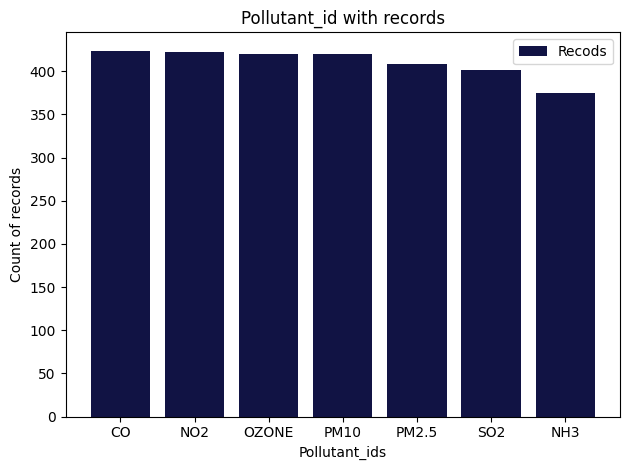

In [ ]:
plt.bar(
    data["pollutant_id"].value_counts().index,
    data["pollutant_id"].value_counts().values,
    color="#111344",
    label="Recods",
)
plt.title("Pollutant_id with records")
plt.xlabel("Pollutant_ids")
plt.ylabel("Count of records")
plt.legend()
plt.tight_layout()
plt.show()

#### 2. Top 5 cities by measurements → Count of rows per city, then plot a horizontal bar chart.


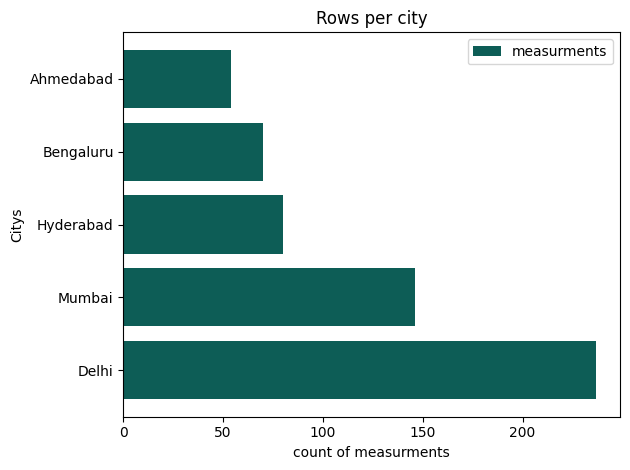

In [ ]:
plt.barh(
    data["city"].value_counts().head(5).index,
    data["city"].value_counts().head(5).values,
    color="#0D5D56",
    label="measurments",
)
plt.title("Rows per city")
plt.xlabel("count of measurments")
plt.ylabel("Citys")
plt.legend()
plt.tight_layout()
plt.show()

#### 3. Basic pollutant_avg distribution → Histogram of pollutant_avg (to see its spread).


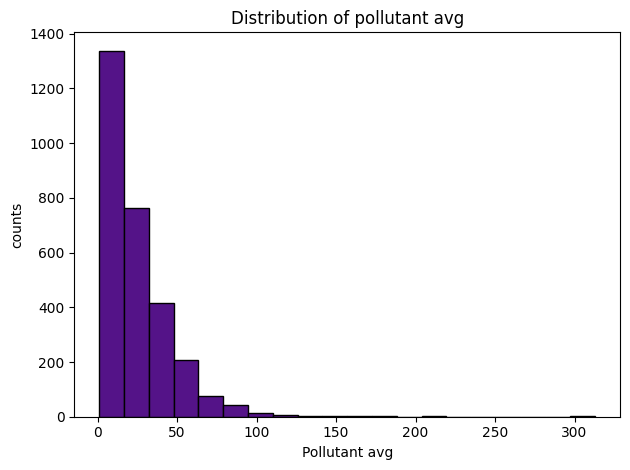

In [ ]:
plt.hist(data["pollutant_avg"], bins=20, color="#541388", edgecolor="black")
plt.title("Distribution of pollutant avg")
plt.xlabel("Pollutant avg")
plt.ylabel("counts")
plt.tight_layout()
plt.show()

# Deeper Insights with Visualizations


#### 1. Pollutant comparison across top cities


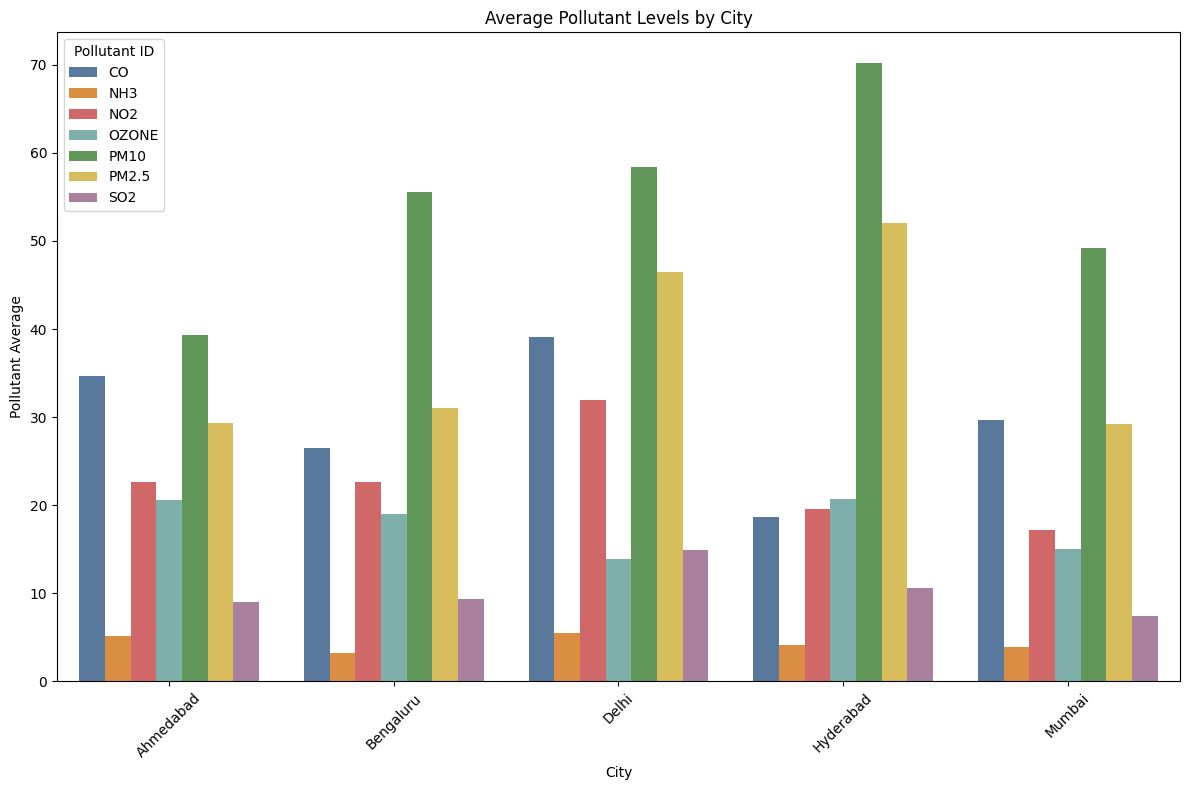

In [16]:
top_cities = data["city"].value_counts().head(5).index.tolist()
res = (
    data[data["city"].isin(top_cities)]
    .groupby(["city", "pollutant_id"])["pollutant_avg"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(12, 8))
sns.barplot(
    data=res,
    x="city",
    y="pollutant_avg",
    hue="pollutant_id",
    palette=[
        "#4E79A7",
        "#F28E2B",
        "#E15759",
        "#76B7B2",
        "#59A14F",
        "#EDC948",
        "#B07AA1",
    ],
)
plt.title("Average Pollutant Levels by City")
plt.xlabel("City")
plt.ylabel("Pollutant Average")
plt.xticks(rotation=45)
plt.legend(title="Pollutant ID", loc="upper left")
plt.tight_layout()
plt.show()

#### 2. Pollutant range analysis


In [ ]:
data[data["pollutant_id"] == "PM10"].groupby(["pollutant_id"])[
    ["pollutant_min", "pollutant_max", "pollutant_avg"]
].mean()

,pollutant_min,pollutant_max,pollutant_avg
pollutant_id,,,
PM10,27.114286,82.633333,47.861905


#### 4.Geographical view (optional)


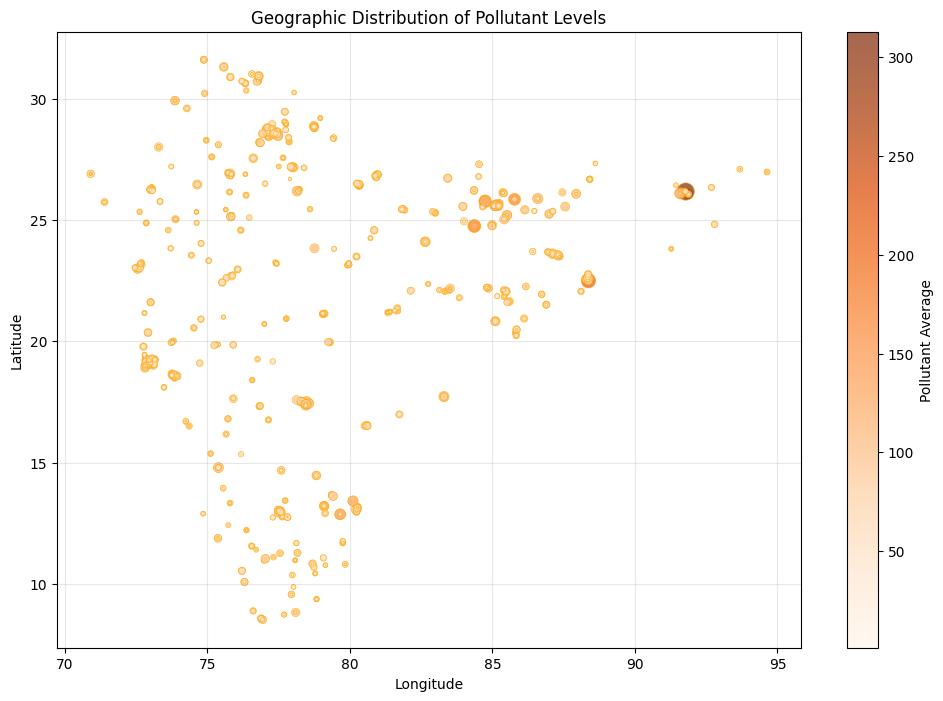

In [43]:
plt.figure(figsize=(12, 8))
plt.scatter(
    data["longitude"],
    data["latitude"],
    c=data["pollutant_avg"],
    marker=".",
    s=data["pollutant_avg"] * 2,
    cmap="Oranges",
    alpha=0.7,
    edgecolors="orange",
    linewidth=0.5,
)

plt.colorbar(label="Pollutant Average")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographic Distribution of Pollutant Levels")
plt.grid(True, alpha=0.3)
plt.show()

#### 5. top 10 cities with highest polllutant avg


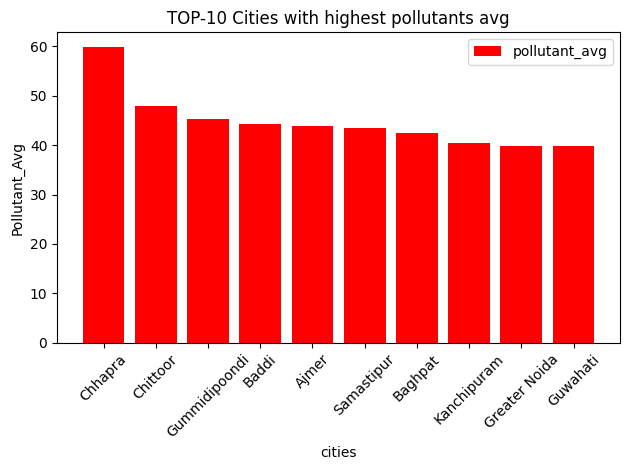

In [ ]:
cities = data.groupby("city")["pollutant_avg"].mean().nlargest(10)


plt.bar(cities.index, cities.values, color="red", label="pollutant_avg")
plt.title("TOP-10 Cities with highest pollutants avg")
plt.xlabel("cities")
plt.xticks(rotation=45)
plt.ylabel("Pollutant_Avg")
plt.legend()
plt.tight_layout()
plt.show()

### TOP-3 Cities in all Pollutants

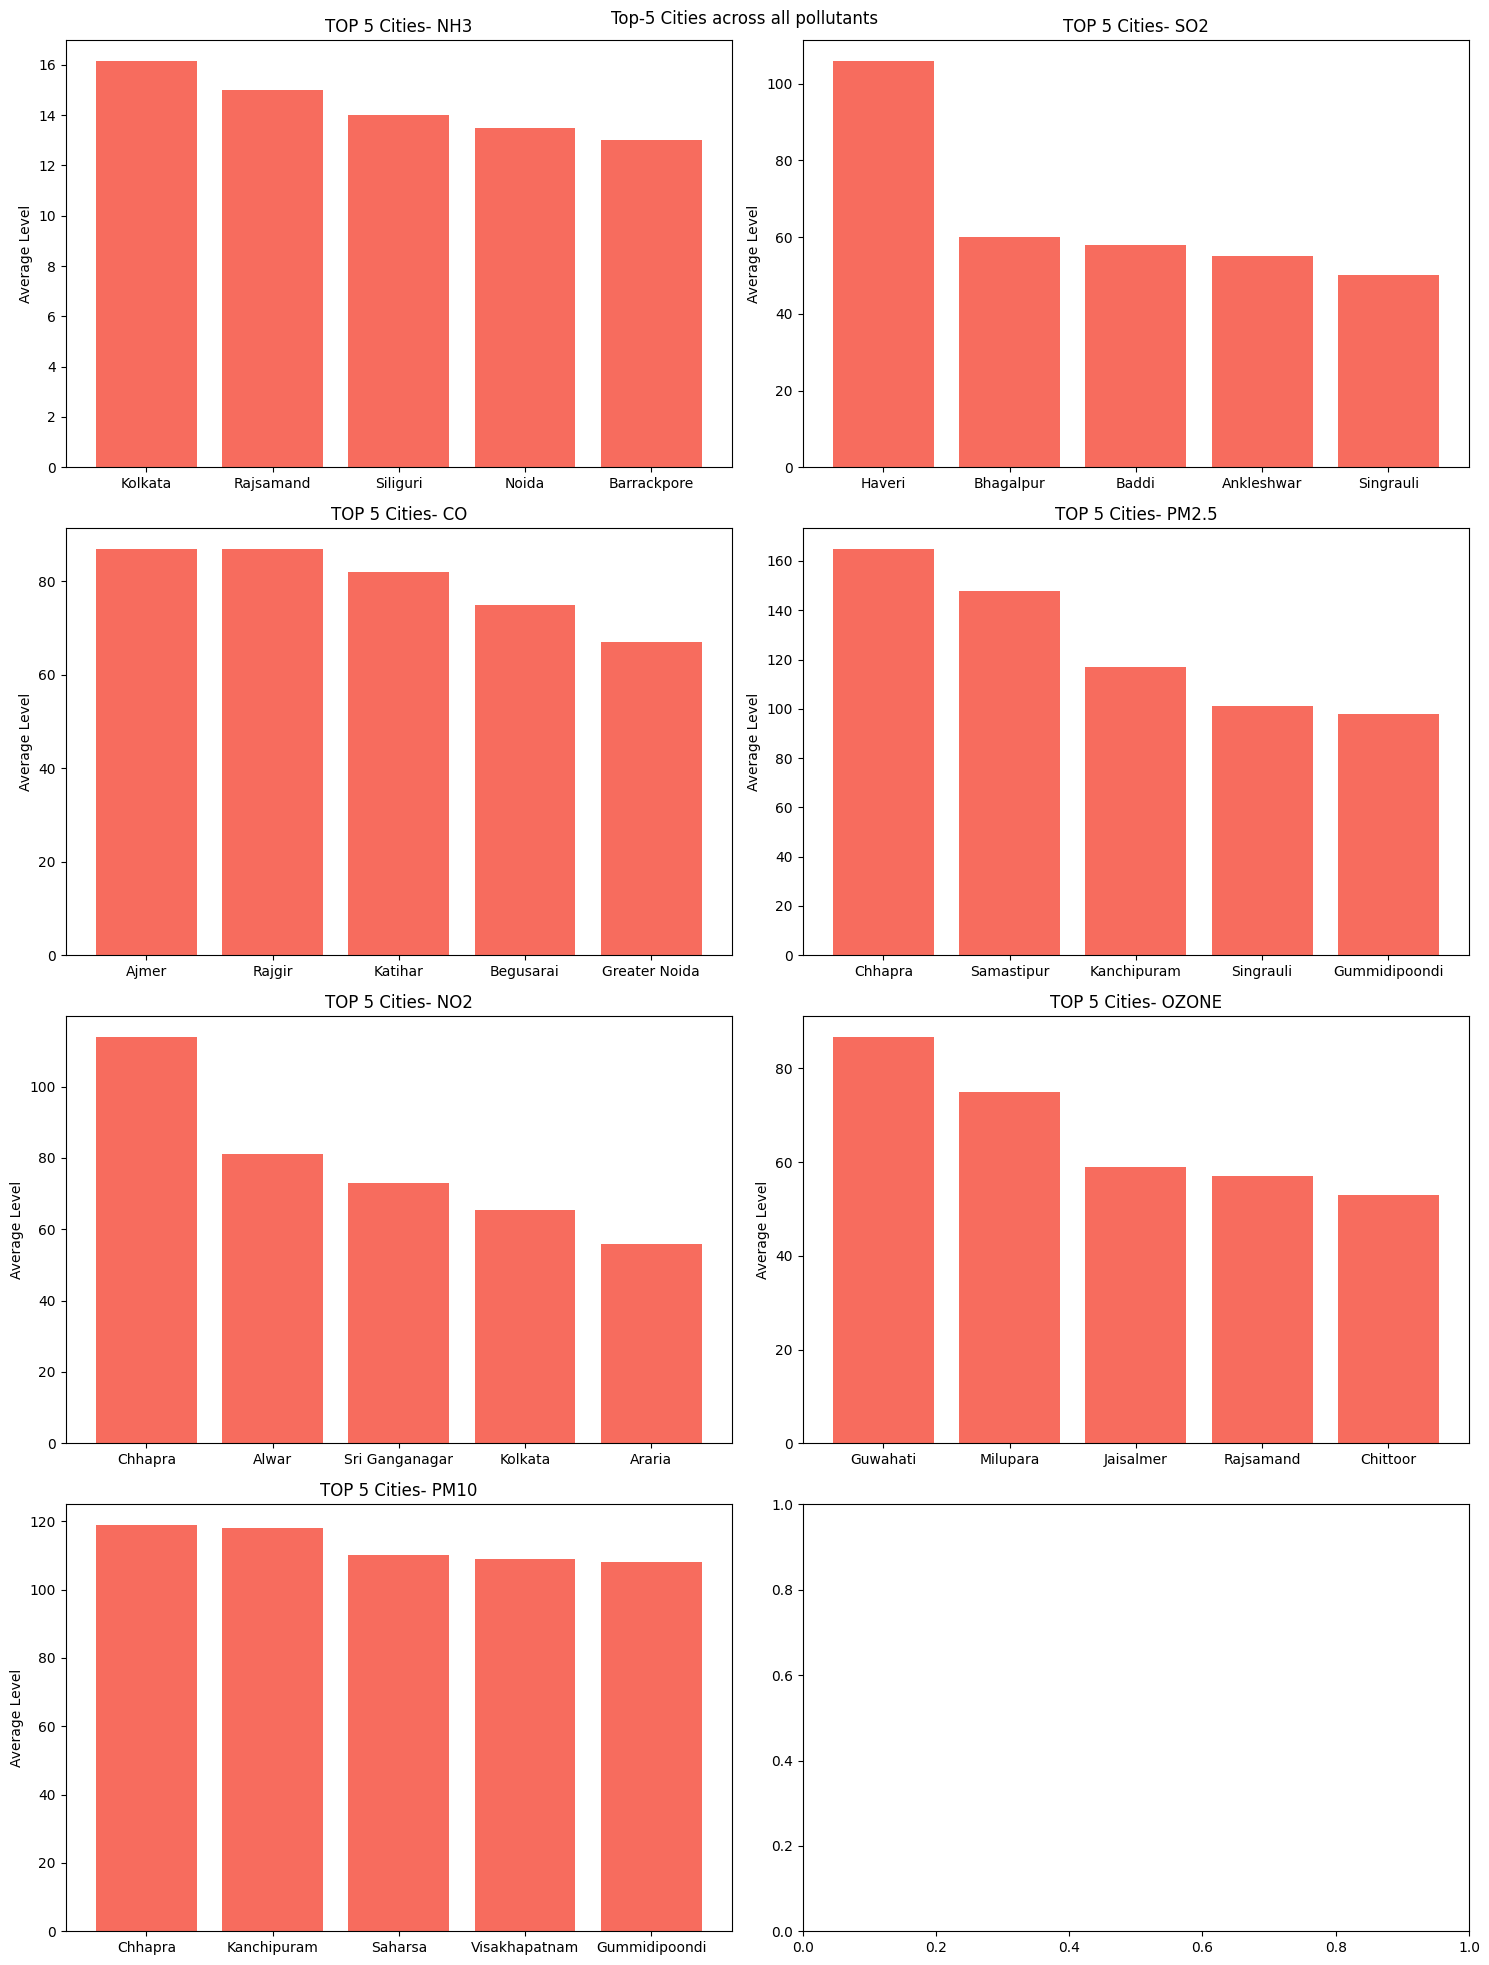

In [ ]:
fig, ax = plt.subplots(4, 2, figsize=(15, 20))
ax = ax.flatten()
for i, id in enumerate(data["pollutant_id"].unique()):
    res = (
        data[data["pollutant_id"] == id]
        .groupby("city")["pollutant_avg"]
        .mean()
        .nlargest(5)
    )
    ax[i].bar(res.index, res.values, color="#F76C5E")
    ax[i].set_title(f"TOP 5 Cities- {id}")
    ax[i].set_ylabel("Average Level")
    ax[i].tick_params(axis="x")
plt.suptitle("Top-5 Cities across all pollutants")
plt.tight_layout()
plt.show()

In [ ]:
res = data.groupby('state')['pollutant_avg'].mean().nlargest(5).reset_index()

,state,pollutant_avg
0,Himachal Pradesh,44.285714
1,Haryana,31.200000
2,Bihar,30.984536
3,Delhi,30.949367
4,Andhra_Pradesh,30.666667
